# Tutorial 01 - Python for Computer Vision
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schedldave/cv2021/blob/main/01_PythonTutorial.ipynb)
## Dr. David C. Schedl

Note: this tutorial is geared towards students **experienced in general programming** and aims to introduce you to Python and some of the libraries we will use in the computer vision course.

adapted from: 
* https://cs231n.github.io/python-numpy-tutorial/ (written by Justin Johnson; @Stanford)
* http://6.869.csail.mit.edu/fa19/schedule.html (written by Julie Ganeshan; @MIT)


# Content
In this tutorial, we will cover:
* Python Setup: Python, Miniconda, pip, Colab
* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

# Useful Links:
* [Python Documentation](https://docs.python.org/3.8/)
* If you know Matlab, you can find the differences [here](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html).

# Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. 
Furthermore, we use Jupyter Notebooks which allows mixing text with code (as shown in this notebook).
As an example, here is an implementation of the classic quicksort algorithm in Python:

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

## Setup

You have the option to run the code *online* with Google Colab (requires a Google account) or *locally* with your own installation of Python and an editor (I recommend Visual Studio Code).

### Online: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schedldave/cv2021/blob/main/PythonTutorial.ipynb)
Everything runs on a Google machine, so you don't need to set up anything on your computer. Furthermore, the machines come with the most popular libraries preinstalled.

### Local:
Install Python on your computer via [Conda/Miniconda](https://conda.io/projects/conda/en/latest/user-guide/install/windows.html) or the [Python Installer](https://www.python.org/downloads/). Use Python3, as Python2 is not supported anymore. Furthermore, you need an Editor that support Jupyter (`.ipynb`)  notebooks. I recommend using [Visual Studio Code](https://code.visualstudio.com/download). Optionally, you can also use a local server and open [Notebooks in your browser](https://test-jupyter.readthedocs.io/en/latest/install.html) (Visual Studio simplifies this).


## Libraries

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries it becomes a powerful environment for scientific computing. 
Per default no libraries are installed, so you need to install them to be able to use them. Any `import ...` command in Python code refers to a library. Common libraries are numpy, scipy, matplotlib.

Note, you can skip this step if you use Colab!

The libraries we use today are listed in `requirements.txt` and can be installed via a package manager.
Use 
* `pip install -r requirements.txt`, if you use a regular Python installation or 
* `conda install --file requirements.txt` with Conda/Miniconda.

To verify the installation of the required libraries import numpy and matplotlib:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Basics

## Data Types

### Numbers

Integers and floats work as you would expect from other languages:

In [ ]:
x = 3
y = 3.0
print(x, type(x))
print(y, type(y))

In [ ]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation
x += 1
print(x)
x *= 2
print(x)
print(y, y + 1, y * 2, y ** 2)

### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):






In [ ]:
t, f = True, False
print(type(t))

In [ ]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;
print(t is not f) # Logical XOR (same as above);

### Strings

In [ ]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello))

hw = hello + ' ' + world  # String concatenation
print(hw)



String objects have a bunch of useful methods; for example:

In [ ]:
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace

Since Python 3.6 formatted string literals or f-strings can be used to format strings. These strings start with an `f` contain the variable to format in a curly bracket (`{}`): 

In [ ]:
hw12 = f'{hello} {world} {12}'  # string formatting
print(hw12)

print( F'int {12:d} | floats {12.3:f} {12.3:05.1f}' )  # formatting numbers

Formatting can also be done with the legacy `{}` and `.format`. I think f-strings are better, though. 

In [ ]:
hw12 = '{} {} {}'.format(hello, world, 12)  # string formatting
print(hw12)

print( 'int {:d} | floats {:f} {:05.1f}'.format(12,12.3,12.3) )  # formatting numbers

## Containers

### Lists

A list is the Python equivalent of an array ([Python documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists) ), but is resizeable and can contain elements of different types:

In [ ]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

In [ ]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

We can also create a list of lists, which is similar to a 2D array:

In [ ]:
xys = [[1,2,3,4,5],
       [6,7,8,9]] # note, that the lists do not need to be of equal size.
print(xys)
print(xys[0][4])  # access the '2D' array

### Slicing
In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing. 
The general syntax is `list [start:stop[:step]]`
This is very powerful and not limited to lists only. We will use that syntax later with Numpy too!

In [ ]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints "[0, 1, 2, 3]"
print(nums[::2])    # Using step to get every second element; prints "[0, 2, 4]"
nums[2:4] = [8, 9]  # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

### Loops
You can loop over the elements of a list like this:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

### List comprehensions

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:



In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

You can make this code simpler using a list comprehension, which can also contain conditions.
Note that this list comprehensions can get quite complex and obfuscated, so they might be hard to interpret sometimes!

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0 ]
print(even_squares)

### Sets

A set is an unordered collection of distinct elements. 
As a simple example, consider the following:

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))    

A main difference of sets to lists is, that sets do not allow duplicates. 
Loops and list comprehensions, however are very similar to their equivalents for lists. 

In [ ]:
nums_set = {4, 1, 2, 3, 4, 0, 4}  # note the ordering
print(type(nums_set), nums_set)   # no duplicates are possible

nums_list = [4, 1, 2, 3, 4, 0, 4]   # note the ordering
print(type(nums_list), nums_list)   # no duplicates are possible

nums_set.add( 4 )
print(nums_set)

_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

In [ ]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

In [ ]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

In [ ]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

In [ ]:
del d['fish']        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])
print(d)

In [ ]:
t[0] = 1 # Error: tuples cannot be changed

## Functions

Python functions are defined using the `def` keyword. For example:

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

We will often define functions to take optional keyword arguments, like this:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

## Classes

The syntax for defining classes in Python is straightforward:

In [ ]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

## Docstrings

A good piece of software needs documentation.
With docstrings, Python provides a great way for documenting functions, classes, methods, etc. A docstring is a string literal that occurs as the first statement of a definition. Most IDEs support reading and showing docstrings (including Colab), so they help you and others to use and understand your code. 

There are various conventions, however. One very common is [Google's Style](
https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).

In [ ]:
def well_documented_hello(name, loud=False):
  """A function that greets a person.

  Args:
    name (str): The name of the person.
    loud (bool, optional): If True greet is uppercase. Defaults to False. 

  Returns:
    str: The uppercase name of the person.
  """
  if loud:
      print('HELLO, {}'.format(name.upper()))
  else:
      print('Hello, {}!'.format(name))

  return name.upper()

well_documented_hello('Bob')
well_documented_hello('Fred', loud=True)

## Type Hints

Since Python 3.5 it is possible to add type annotations. 
The **Python runtime does not enforce** function and variable type annotations. However, they can be used by third party tools such as type checkers, IDEs, linters, etc. and help to understand and read your code.

Here is an example of our `hello` function:

In [ ]:
def typed_hello(name: str, loud: bool=False) -> str:
  """A function that greets a person.

  Args:
    name: The name of the person.
    loud: If True greet is uppercase. Defaults to False. 

  Returns:
    The uppercase name of the person.
  """
  if loud:
      print('HELLO, {}'.format(name.upper()))
  else:
      print('Hello, {}!'.format(name))

  return name.upper()

typed_hello('Bob')
typed_hello('Fred', loud=True)

# Typing works with variables outside functions too!
typed_variable: str = 'Max'
print(typed_variable)

# Numpy

Numpy is a numerical library that provides **_tons_** of useful functions for scalar, array, and matrix types. We'll only go into a small scratch of numpy.

**Why numpy instead of regular `for` loops**? \
In addition to the convenience of not redesigning the wheel, much of Numpy is built directly in C++ and is well optimized, so it runs *very* fast

Let's import numpy now! It is customary to call it `np`, since you need to reference it a lot.

In [4]:
import numpy as np

## Arrays, Matrices, and Tensors

One of the most important primitives in numpy is the `np.array` - this represents a fixed-size array (or list) of elements.

Unlike Python lists, numpy arrays **MUST HAVE THE SAME TYPE**. The types allowed by numpy are below. Note that you have greater control over how much space is used by each datatype than Python primitives:
- float16, float32, float64 (decimal values)
- int8, int16, int32, int64 (integers)
- uint8, uint16, uint32, uint64 (unsigned, or positive, integers)
- bool (boolean)
- complex64, complex128 (Complex numbers, represented as 2 floats)

All of these types have a default size that you can access with `float`, `int`, and so on.

Let's make an array from a Python list!

In [13]:
a = np.array([1, 2, 3], dtype=np.int8)
b = np.array([10, 20, 30], dtype=np.int64)
print("A is %s. B is %s" % (repr(a), repr(b)))
print("Object Type of a:",type(a))
print(f"Size of a: {a.nbytes} bytes")
print(f"Size of b: {b.nbytes} bytes")

A is array([1, 2, 3], dtype=int8). B is array([10, 20, 30], dtype=int64)
Object Type of a: <class 'numpy.ndarray'>
Size of a: 3 bytes
Size of b: 24 bytes


Let's see what type numpy inferred from our data

In [3]:
a.dtype

dtype('int32')

You can get a casted version of an array using the function `astype`

In [4]:
a.astype(complex)

array([1.+0.j, 2.+0.j, 3.+0.j])

We can access elements of an array using the same `[]` notation we're used to. We can even use negatives to index from the end, and make slices.

In [14]:
print(a[1])
print(b[-1])
print(repr(a[0:3:2]))

2
30
array([1, 3], dtype=int8)


Since arrays have a fixed size, we can get this size as a tuple using the `shape` attribute - you can't set this though!

In [15]:
print(a.shape)
print(b.shape)

(3,)
(3,)


We can also change elements of the array - we just can't add new elements

In [16]:
a[0] = 100
print(repr(a))

array([100,   2,   3], dtype=int8)


Since `a` and `b` are numpy arrays, we can do math with them now! These operations, by default, will happen out-of-place (a new array will be created to store the result)

In [17]:
print("Numpy math:")
print(a,"+",b,"=",a + b)

# If they weren't numpy arrays
print("\nVanilla Python List math:")
print(list(a),"+",list(b),"=",list(a) + list(b))

Numpy math:
[100   2   3] + [10 20 30] = [110  22  33]

Vanilla Python List math:
[100, 2, 3] + [10, 20, 30] = [100, 2, 3, 10, 20, 30]


This is a small example, but we'll soon see more complicated operations numpy arrays can perform!

### Adding Dimensions
We can also make matrices, by simply giving the constructor the correct shape of data

In [18]:
my_matrix = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(repr(my_matrix))

array([[1, 2, 3],
       [4, 5, 6]])


Now, using shape will be more helpful - note that you couldn't get this shape with a Python list!

In [19]:
print(my_matrix.shape)

(2, 3)


We can access matrix elements using each of their indices in order. (All dimensions are 0-indexed)

In [20]:
print(my_matrix[0,2]) # Get row 0, column 2. The order of these indices matches their respective maximums in shape.

3


We can still use slices, and negative indexing. Slicing a row or column from a matrix gives us a 1D array!

In [21]:
# Get row 0, all columns except the last one
print(repr(my_matrix[0,:-1]))

# Get columns 1 and 2.
print(repr(my_matrix[:, 1:3]))

array([1, 2])
array([[2, 3],
       [5, 6]])


We can also still index into this as an outer-array

In [22]:
# Gets the 0th element of the outer array - that's the 0th row!
print(repr(my_matrix[0]))

array([1, 2, 3])


**NOTE:** Matrices in numpy MUST be rectangular. Unlike nested Python lists, which can have the first list contain 1 element, and the second list contain 3 elements, in a numpy matrix, all rows have to have the same length. In other words, the matrix cannot be "jagged"

Matrices, and other multi-dimensional arrays, are stored in "row-major" format - that is, elements of a row are stored next to each other. 

So, in this way, we can think of a multidimensional matrix as a single contiguous array, where shapes are just a human abstraction. Let's get this matrix as a 1D array.

In [23]:
print(my_matrix.ravel())

[1 2 3 4 5 6]


So, we can actually shape these 6 elements into whatever shape we want! This can be useful to create high dimensional arrays.

In [24]:
my_reshaped_matrix = my_matrix.reshape((3,2))
my_reshaped_matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

Unless you explicitly use `np.copy`, Reshapes and slices create *views* of your data - that is, they all reference the same data! So, since the variables are all aliases to the same data, changes to one will reflect in all the others! This is a double-edged sword that can boost your performance, but might catch you off guard.

In [25]:
print("Original my_matrix")
print(repr(my_matrix))
print("Original my_reshaped_matrix")
print(repr(my_reshaped_matrix))

# Change an element
print("===MAKING A CHANGE===")
my_matrix[0,0] = 100 - my_matrix[0, 0]

print("New my_matrix")
print(repr(my_matrix))
print("New my_reshaped_matrix")
print(repr(my_reshaped_matrix))

Original my_matrix
array([[1, 2, 3],
       [4, 5, 6]])
Original my_reshaped_matrix
array([[1, 2],
       [3, 4],
       [5, 6]])
===MAKING A CHANGE===
New my_matrix
array([[99,  2,  3],
       [ 4,  5,  6]])
New my_reshaped_matrix
array([[99,  2],
       [ 3,  4],
       [ 5,  6]])


### Try it yourself!

You should now be able to do [Exercise 1](#exercise1)

### The third dimension and beyond

We were able to add a dimension to a 1D array to make a 2D matrix.
In fact, numpy can handle even more dimensions! 
In computer vision, we often will use 3 dimensions worth of data (Height x Width x 3 colors)

A "matrix" with 3 or more dimensions is called a *Tensor*.  
Let's make a 2 x 3 x 4 tensor (2 stacked 3x4 matrices)

In [32]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4)
print(my_tensor)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


We can use a tensor like any matrix or array

In [33]:
# Get the 0th matrix slice, the 1st row of that matrix, and the 2nd column of that row
print(my_tensor[0,1,2])

6


### Array Creation
Numpy also provides several convenience functions to help you make make empty ndarrays

In [34]:
desired_shape = (2,3)

Some useful ones:
- zeros: Creates an array filled with zeros
- ones: An array of ones
- eye: The identity matrix I (needs 1 integer for square size)
- full: Fills with an element
- np.random.random: Random between 0 and 1
- np.random.randn: Random normal

In [35]:
print(repr(  np.zeros(desired_shape)          ),end="\n\n")
print(repr(  np.ones(desired_shape)           ),end="\n\n")
print(repr(  np.eye(3)                        ),end="\n\n")
print(repr(  np.full(desired_shape, 7)        ),end="\n\n")
print(repr(  np.random.random(desired_shape)  ),end="\n\n")

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[7, 7, 7],
       [7, 7, 7]])

array([[0.32783087, 0.5964042 , 0.65878064],
       [0.22033386, 0.20790544, 0.65025389]])



They are float32's by default, but we can also choose the datatype of the created array

In [5]:
np.eye(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## Array Indexing

We've already done a lot of indexing into arrays above, but let's look at some more details

In [6]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4).astype(int)
my_tensor

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### Getting Elements
We can get elements by fully specifying the index

In [7]:
my_tensor[0,1,2]

6

If we partially specify the index (in order), since this is a list-of-lists, basically, we'll get "rows" (or matrices, if taking parts of a tensor

In [40]:
my_tensor[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
my_tensor[0, 0]

array([0, 1, 2, 3])

By this logic, we can also keep adding square brackets (get the matrix, then the row, then the column).

In [42]:
my_tensor[0][0]

array([0, 1, 2, 3])

We can also use standard slice notation. Again, we don't have to specify all the dimensions.

In [43]:
my_tensor[0, 0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### Setting elements

We can set elements that we index too.

In [44]:
my_tensor[0, 0, 0] = 100
my_tensor

array([[[100,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

We can also set blocks / slices that we index into, as long as the shapes match!

In [8]:
# Get the 0th matrix slice. Rows 1 and 2. Get every other column starting from 0
my_tensor[0,1:3,0::2]

array([[ 4,  6],
       [ 8, 10]])

In [9]:
replacement = (np.eye(2, dtype=int) + 2) * 100
replacement

array([[300, 200],
       [200, 300]])

In [10]:
my_tensor[0, 1:3, 0::2] = replacement
my_tensor

array([[[  0,   1,   2,   3],
        [300,   5, 200,   7],
        [200,   9, 300,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

### Using Boolean and Integer Arrays as indices

What if we want some sort of permutation of the tensor, that's not easy to express in slice notation?

We can index into an array using an array of integers!

Let's test this out on a small array first.


In [11]:
my_array = np.array(range(5)) * 10 + 3
my_array

array([ 3, 13, 23, 33, 43])

In [12]:
# We want the elements in this order
array_of_indices = np.array([4,1,3,0,2])
array_of_indices

array([4, 1, 3, 0, 2])

Let's index into our array with our index-array!

In [13]:
my_array[array_of_indices]

array([43, 13, 33,  3, 23])

The shape of the output is determined by the index-array. We can use this to make complicated shapes, repeat elements, or exclude elements!

In [14]:
# Make a selector array
selector = (np.random.random((3,4)) * len(my_array)).astype(int)
selector

array([[0, 0, 1, 2],
       [3, 4, 3, 2],
       [1, 4, 0, 4]])

In [15]:
# Now, we can use these to get elements from our original array!
my_array[selector]

array([[ 3,  3, 13, 23],
       [33, 43, 33, 23],
       [13, 43,  3, 43]])

We can also use boolean arrays (masks) of the same size as the input, to get a part of the output!

In [16]:
my_mask = np.array([1, 0, 0, 1, 1], dtype=bool)
my_mask

array([ True, False, False,  True,  True])

In [17]:
print("Original")
print(repr(my_array))
print("Masked with",repr(my_mask))
print(repr(my_array[my_mask]))

Original
array([ 3, 13, 23, 33, 43])
Masked with array([ True, False, False,  True,  True])
array([ 3, 33, 43])


This is indexing - so we can also SET elements like this!

In [18]:
print(repr(my_array))
replacement = np.array([600, 700, 800])
my_array[my_mask] = replacement
print(repr(my_array))

array([ 3, 13, 23, 33, 43])
array([600,  13,  23, 700, 800])


The `<` and `>` operators return masks - so you can use these to mask the original array, or even other arrays!

In [19]:
my_array > 20

array([ True, False,  True,  True,  True])

In [20]:
my_array[my_array > 20]

array([600,  23, 700, 800])

These concepts all hold in multiple dimensions as well

### Elementwise- and Matrix Math

Indexing and creating arrays is cool, but the real power of Numpy is doing math using those arrays.

The basic mathematical operators (+, -, /, \*, %) are treated as "elementwise" operators - they do something with each element. Which operands are used depends on a concept called "broadcasting". In practice - if you have two ndarrays of the same shape, then the operands will be corresponding elements in each ndarray. Otherwise, if possible, the smaller ndarray/scalar is repeated to be the same size as the larger array.

In [21]:
a = np.array(range(10)).reshape(2,5)
b = np.array(range(100,1100,100)).reshape(2,5)
print("a =",repr(  a  ))
print("b =",repr(  b  ))

a = array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
b = array([[ 100,  200,  300,  400,  500],
       [ 600,  700,  800,  900, 1000]])


Operate on corresponding elements of a and b

In [22]:
a + b

array([[ 100,  201,  302,  403,  504],
       [ 605,  706,  807,  908, 1009]])

In [23]:
a * b

array([[   0,  200,  600, 1200, 2000],
       [3000, 4200, 5600, 7200, 9000]])

We can also use scalars as operands, which will be "broadcast" to every element.

In [24]:
a * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [25]:
b % 3

array([[1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1]], dtype=int32)

### Matrix Math

We can also do more complex math, that accounts for the shape of inputs. For example, matrix multiplication!

In [26]:
A = np.array( range(6) ). reshape((3,2))
B = np.array( range(10,16) ). reshape((2,3))

print("A =", repr(A))
print("B =", repr(B))

A = array([[0, 1],
       [2, 3],
       [4, 5]])
B = array([[10, 11, 12],
       [13, 14, 15]])


In [27]:
np.matmul(A, B)

array([[ 13,  14,  15],
       [ 59,  64,  69],
       [105, 114, 123]])

Here we have multiplied a (3 x 2) matrix by a (2 x 3) matrix to get a (3 x 3). We can get a different result by multiplying the other way. 

In [28]:
np.matmul(B,A)

array([[ 70, 103],
       [ 88, 130]])

You can also use the `@` operator for matrix multiplication

In [29]:
B @ A

array([[ 70, 103],
       [ 88, 130]])

Some other useful operations:
- Transpose: In fact, this is done so often there is a property `.T` of any matrix that computes the transpose
- Inverse: In the linalg submodule (`numpy.linalg.inv`)

Many other useful operators exist in numpy!


In [30]:
# Some arbitrary matrix, maybe representing a system of equations
A = np.array([
    [3, 2, 1],
    [4, 8, 2],
    [1, 2, 3]
])
print("shape", A.shape)
print(repr(A))

shape (3, 3)
array([[3, 2, 1],
       [4, 8, 2],
       [1, 2, 3]])


In [31]:
print("Transpose:\n", repr(A.T))

Transpose:
 array([[3, 4, 1],
       [2, 8, 2],
       [1, 2, 3]])


In [32]:
A_inv = np.linalg.inv(A)
print("Inverse:", repr(A_inv), sep="\n")

Inverse:
array([[ 0.5 , -0.1 , -0.1 ],
       [-0.25,  0.2 , -0.05],
       [ 0.  , -0.1 ,  0.4 ]])


We expect that multiplying the inverse should yield the identity

In [33]:
maybe_identity = np.matmul(A_inv, A)
maybe_identity

array([[ 1.00000000e+00, -2.77555756e-16, -8.32667268e-17],
       [ 4.16333634e-17,  1.00000000e+00,  1.38777878e-17],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

Since we're doing arithmetic with floats, we have small floating point errors. Let's use the elementwise `np.round`

In [34]:
np.round(maybe_identity)

array([[ 1., -0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### Other Useful Functions

Other functions in Numpy that are useful:
- sum: Adds all elements of an ndarray, or sums along a given dimension ("axis")
- stack: joins two arrays in a new dimension
- concatenate: joins two arrays in an existing dimension

In [35]:
A = np.array(range(10)).reshape(2,5)
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [36]:
print("A's Shape is", A.shape)
col_sum = np.sum(A, axis = 0)
row_sum = np.sum(A, axis = 1)
total_sum = np.sum(A)
print("Row sums (shape: %s) - sum all values on axis 1 (along the column)" % str(row_sum.shape))
print(repr(row_sum))
print("Col sums (shape: %s) - sum all values on axis 0 (along the row)" % str(col_sum.shape))
print(repr(col_sum))
print("Full array sum (scalar)")
print(repr(total_sum))

A's Shape is (2, 5)
Row sums (shape: (2,)) - sum all values on axis 1 (along the column)
array([10, 35])
Col sums (shape: (5,)) - sum all values on axis 0 (along the row)
array([ 5,  7,  9, 11, 13])
Full array sum (scalar)
45


**Stacking Arrays**

In [37]:
A = np.array((range(10))).reshape(2,5)
B = np.array((range(10,20))).reshape(2,5)
print("A=",repr(A),sep="\n")
print("B=",repr(B),sep="\n")

A=
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
B=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])


Stack arrays on a new axis with `numpy.stack`.

In [38]:
stacked = np.stack([A,B])
print("A shape: %s  ---  B shape: %s  ---  stacked shape: %s" % (A.shape, B.shape, stacked.shape))
stacked

A shape: (2, 5)  ---  B shape: (2, 5)  ---  stacked shape: (2, 2, 5)


array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

**Concatenating arrays** \
Concatenate arrays along an existing axis 0 (change only axis 0, rest of shape should be same).

In [39]:
catted = np.concatenate([A,B], axis=0)
print("A shape: %s  ---  B shape: %s  ---  catted shape (meow!): %s" % (A.shape, B.shape, catted.shape))
catted

A shape: (2, 5)  ---  B shape: (2, 5)  ---  catted shape (meow!): (4, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Try it yourself!

You should now be able to do [Exercise 2](#exercise2) (a) to (c)

# Matplotlib

Matplotlib is a plotting library. `matplotlib.pyplot` exposes a stateful, easy to use, plotting system

In [41]:
import matplotlib
import matplotlib.pyplot as plt

### Plotting

Let's make a simple 2d plot

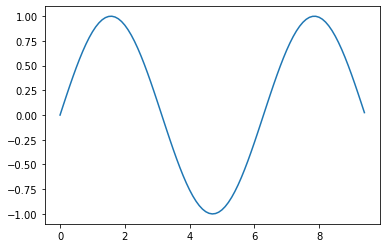

In [42]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

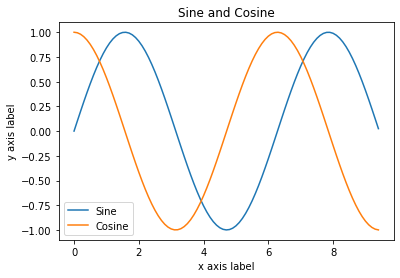

In [43]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

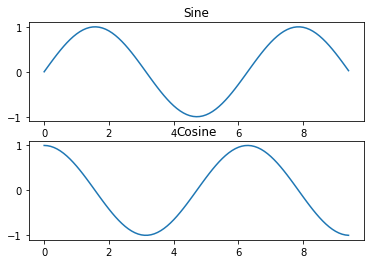

In [45]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

### Try it yourself!

You should now be able to do [Exercise 2](#exercise2) (d)

# Exercises _TODOs_

All of the exercises below are doable with the information you've been presented thus far.
Have fun!


## Exercise 1   <a id='exercise1' name='exercise1'></a>
**Grading students**
The class has `num_students` students. Each student has `num_grades` grades, one for each assignment. 
Grades are stored in a numpy ndarray, of shape `(num_students, num_grades)`. (Each row is a student, each column is an assignment)

**(a)** Create a numpy array of the proper shape to hold the grades table, and fill it with the values `[0, num_students * num_grades)`, going left-to-right, then top-to-bottom.

**(b)** We have a meeting with the student Julie, whose index is `2`, and want to see how she's doing in the class. Use ndarray slicing to get an array containing all of her grades (index 2).

**(c)** The lecturer wants to know if Assignment 4 (index 4) is too hard. Use ndarray slicing to extract the whole classes grades for this assignment.

In [ ]:
num_students  = 4
num_grades    = 5

# (a)
grades_table = []

# (b)
julies_grades = []

# (c)
pset4_grades = []

In [31]:
"""Solution"""

num_students  = 4
num_grades    = 5

# (a)
grades_table = np.reshape(np.array(range(num_students * num_grades)), (num_students, num_grades))
print(grades_table)

# (b)
julies_index = 2
julies_grades = grades_table[julies_index]
print(julies_grades)

# (c)
pset4_grades = grades_table[:,4]
print(pset4_grades)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[10 11 12 13 14]
[ 4  9 14 19]


## Exercise 2  <a id='exercise2' name='exercise2'></a>
**Human Pose Estimation** The results of a pose estimation algorithm are stored in a matrix of shape `(num_keypoints, 3)` (each row is a key point on the body like the head, the torso, or an arm and the columns are the positions X,Y,Z). A "joint" is a connection between two keypoints, expressed as a matrix of shape `(num_joints, 2)`, (each row is a joint, the columns are START_KEYPOINT_INDEX and END_KEYPOINT_INDEX). For example, the joint connecting the head (index 0) with the torso (index 1) is `[0, 1]`.

**(a)** Create a matrix of joint starts, and another matrix of joint ends, each of shape `(num_joints, 3)`. The starts table should contain the position of the start of each joint (according to `keypoint_positions`)  

**(b)** Create a matrix of joint-displacements, of shape `(num_joints, 3)`. Each row represents a joint. The columns should be the difference in X, Y, and Z between the start of the joint, and the end of the joint, respectively `(endX - startX, endY - startY, endZ-startZ)`. 

**(c)** Find the length of each joint (these displacement vectors), and output the results in an array of length `num_joints`

**(d)** (_after Matplotlib section_) Utilize `matplotlib` to draw the joints as lines. After drawing you should see a stick figure. 


In [46]:
num_keypoints = 7
num_joints = 6


# All Z's in one plane, but makes it easier to see XYZ vs Start/end
keypoint_positions = np.array(
    [
        [0, 1, 0],  #0 Head
        [0, 0, 0],  #1 Torso
        [1, 0, 0],  #2 Right Arm
        [-1, 0, 0], #3 Left Arm
        [0, -1, 0], #4 Lower Torso
        [1, -2, 0], #5 Right Leg
        [-1, -2, 0] #6 Left Leg
    ]
) # shape: num_keypoints x 3

#   O
#  _|_
#   |
#  / \
joints = np.array([
    # Head to torso
    [0, 1],
    # Torso to Right arm
    [1, 2],
    # Torso to Left Arm
    [1, 3],
    # Torso to Lower Torso
    [1, 4],
    # Lower Torso to Right Leg
    [4, 5],
    # Lower Torso to Left Leg
    [4, 6]
]) # shape: num_joints x 2

# (a)
starts  = []
ends    = []


# (b)


# (c)


# (d)



(7, 3)
(6, 2)
(6, 3)
(6, 3)
(6, 3)
(6,)


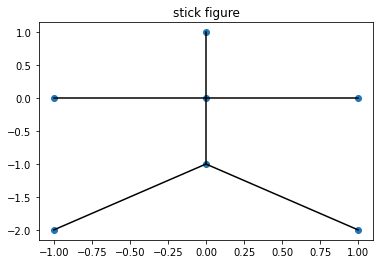

In [58]:
"""Solution"""

num_keypoints = 7
num_joints = 6


# All Z's in one plane, but makes it easier to see XYZ vs Start/end
keypoint_positions = np.array(
    [
        [0, 1, 0],  #0 Head
        [0, 0, 0],  #1 Torso
        [1, 0, 0],  #2 Right Arm
        [-1, 0, 0], #3 Left Arm
        [0, -1, 0], #4 Lower Torso
        [1, -2, 0], #5 Right Leg
        [-1, -2, 0] #6 Left Leg
    ]
)
print(keypoint_positions.shape) # num_keypoints x 3

#   O
#  _|_
#   |
#  / \
joints = np.array([
    # Head to torso
    [0, 1],
    # Torso to Right arm
    [1, 2],
    # Torso to Left Arm
    [1, 3],
    # Torso to Lower Torso
    [1, 4],
    # Lower Torso to Right Leg
    [4, 5],
    # Lower Torso to Left Leg
    [4, 6]
])
print(joints.shape) # num_joints x 2





# (a) Create a matrix of joint starts, and another matrix of joint ends, each of shape `(num_joints, 3)`. The starts table should contain the position of the start of each joint (according to `keypoint_positions`)  
starts  = keypoint_positions[joints[:,0]]
print(starts.shape) # num_joints x 3
ends    = keypoint_positions[joints[:,1]]
print(ends.shape) # num_joints x 3


# (b) Create a matrix of joint-displacements, of shape `(num_joints, 3)`. Each row represents a joint. The columns should be the difference in X, Y, and Z between the start of the joint, and the end of the joint, respectively `(endX - startX, endY - startY, endZ-startZ)`. 
joint_displacements = ends - starts
print(joint_displacements.shape) # num_joints x 3

# (c) Find the length of each joint (these displacement vectors), and output the results in an array of length `num_joints`
joint_lengths = np.linalg.norm(joint_displacements, axis=1)
print(joint_lengths.shape) # num_joints


# (d) Utilize `matplotlib` to draw the joints as lines. After drawing you should see a stick figure. 
plt.plot(keypoint_positions[:,0], keypoint_positions[:,1], 'o')
for i in range(num_joints):
    plt.plot([starts[i,0], ends[i,0]], [starts[i,1], ends[i,1]], '-k')
plt.title('stick figure')
plt.show()

